In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

I want to perform Logistic Regression, Support Vector Machine, and K-means models for classification. Support vector machines do a better job than logistic if the classes are nearly separable.

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

https://archive.ics.uci.edu/dataset/109/wine
The attributes are:
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline 

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.   

The baseline model performance is 80% for Support Vector Machine, 98% for Neural Network Classification, and 94% for Logistic Regression.
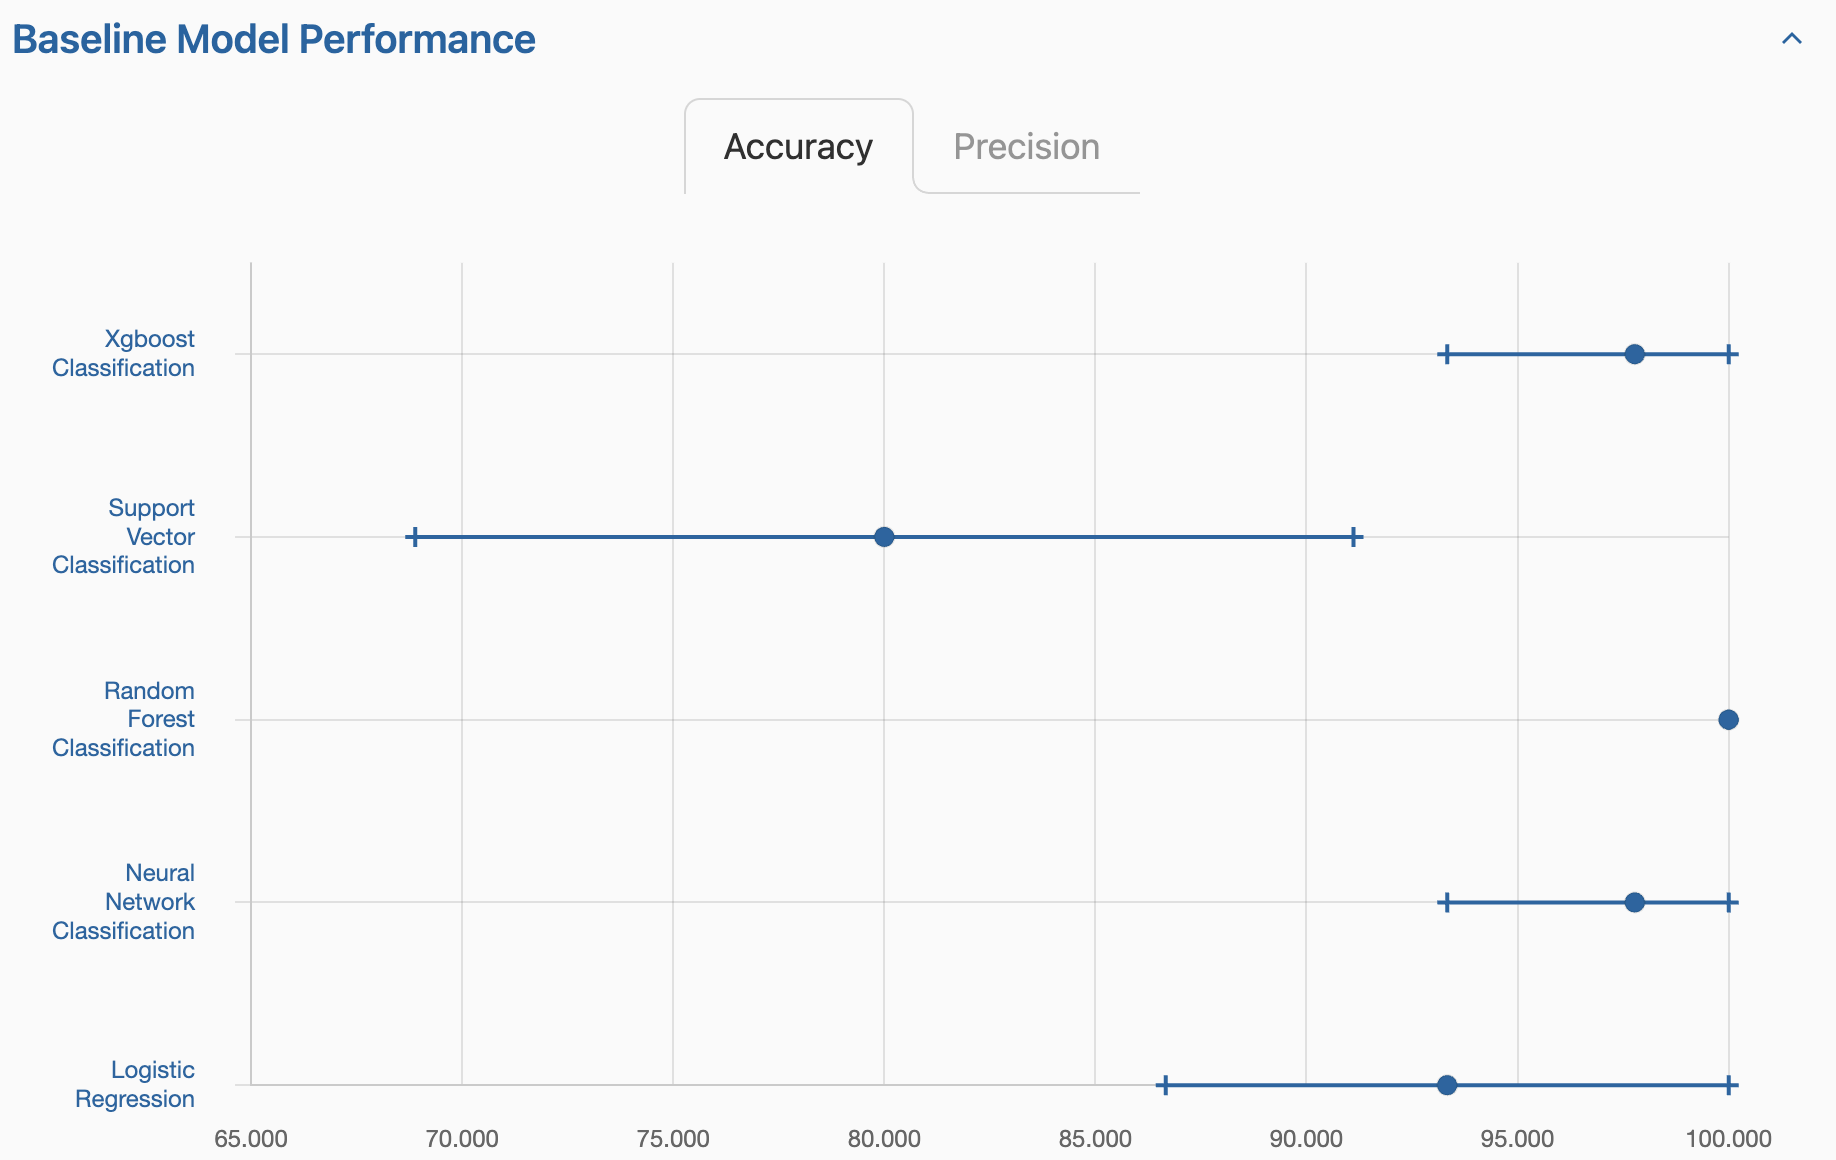

In [31]:
wineDF = pd.read_csv("wine/wine.data", names=["label", "Alcohol","Malic acid","Ash","Alcalinity of ash",
                                               "Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols",
                                               "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines",
                                               "Proline"], index_col=False)
print(wineDF.iloc[:,])

     label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1

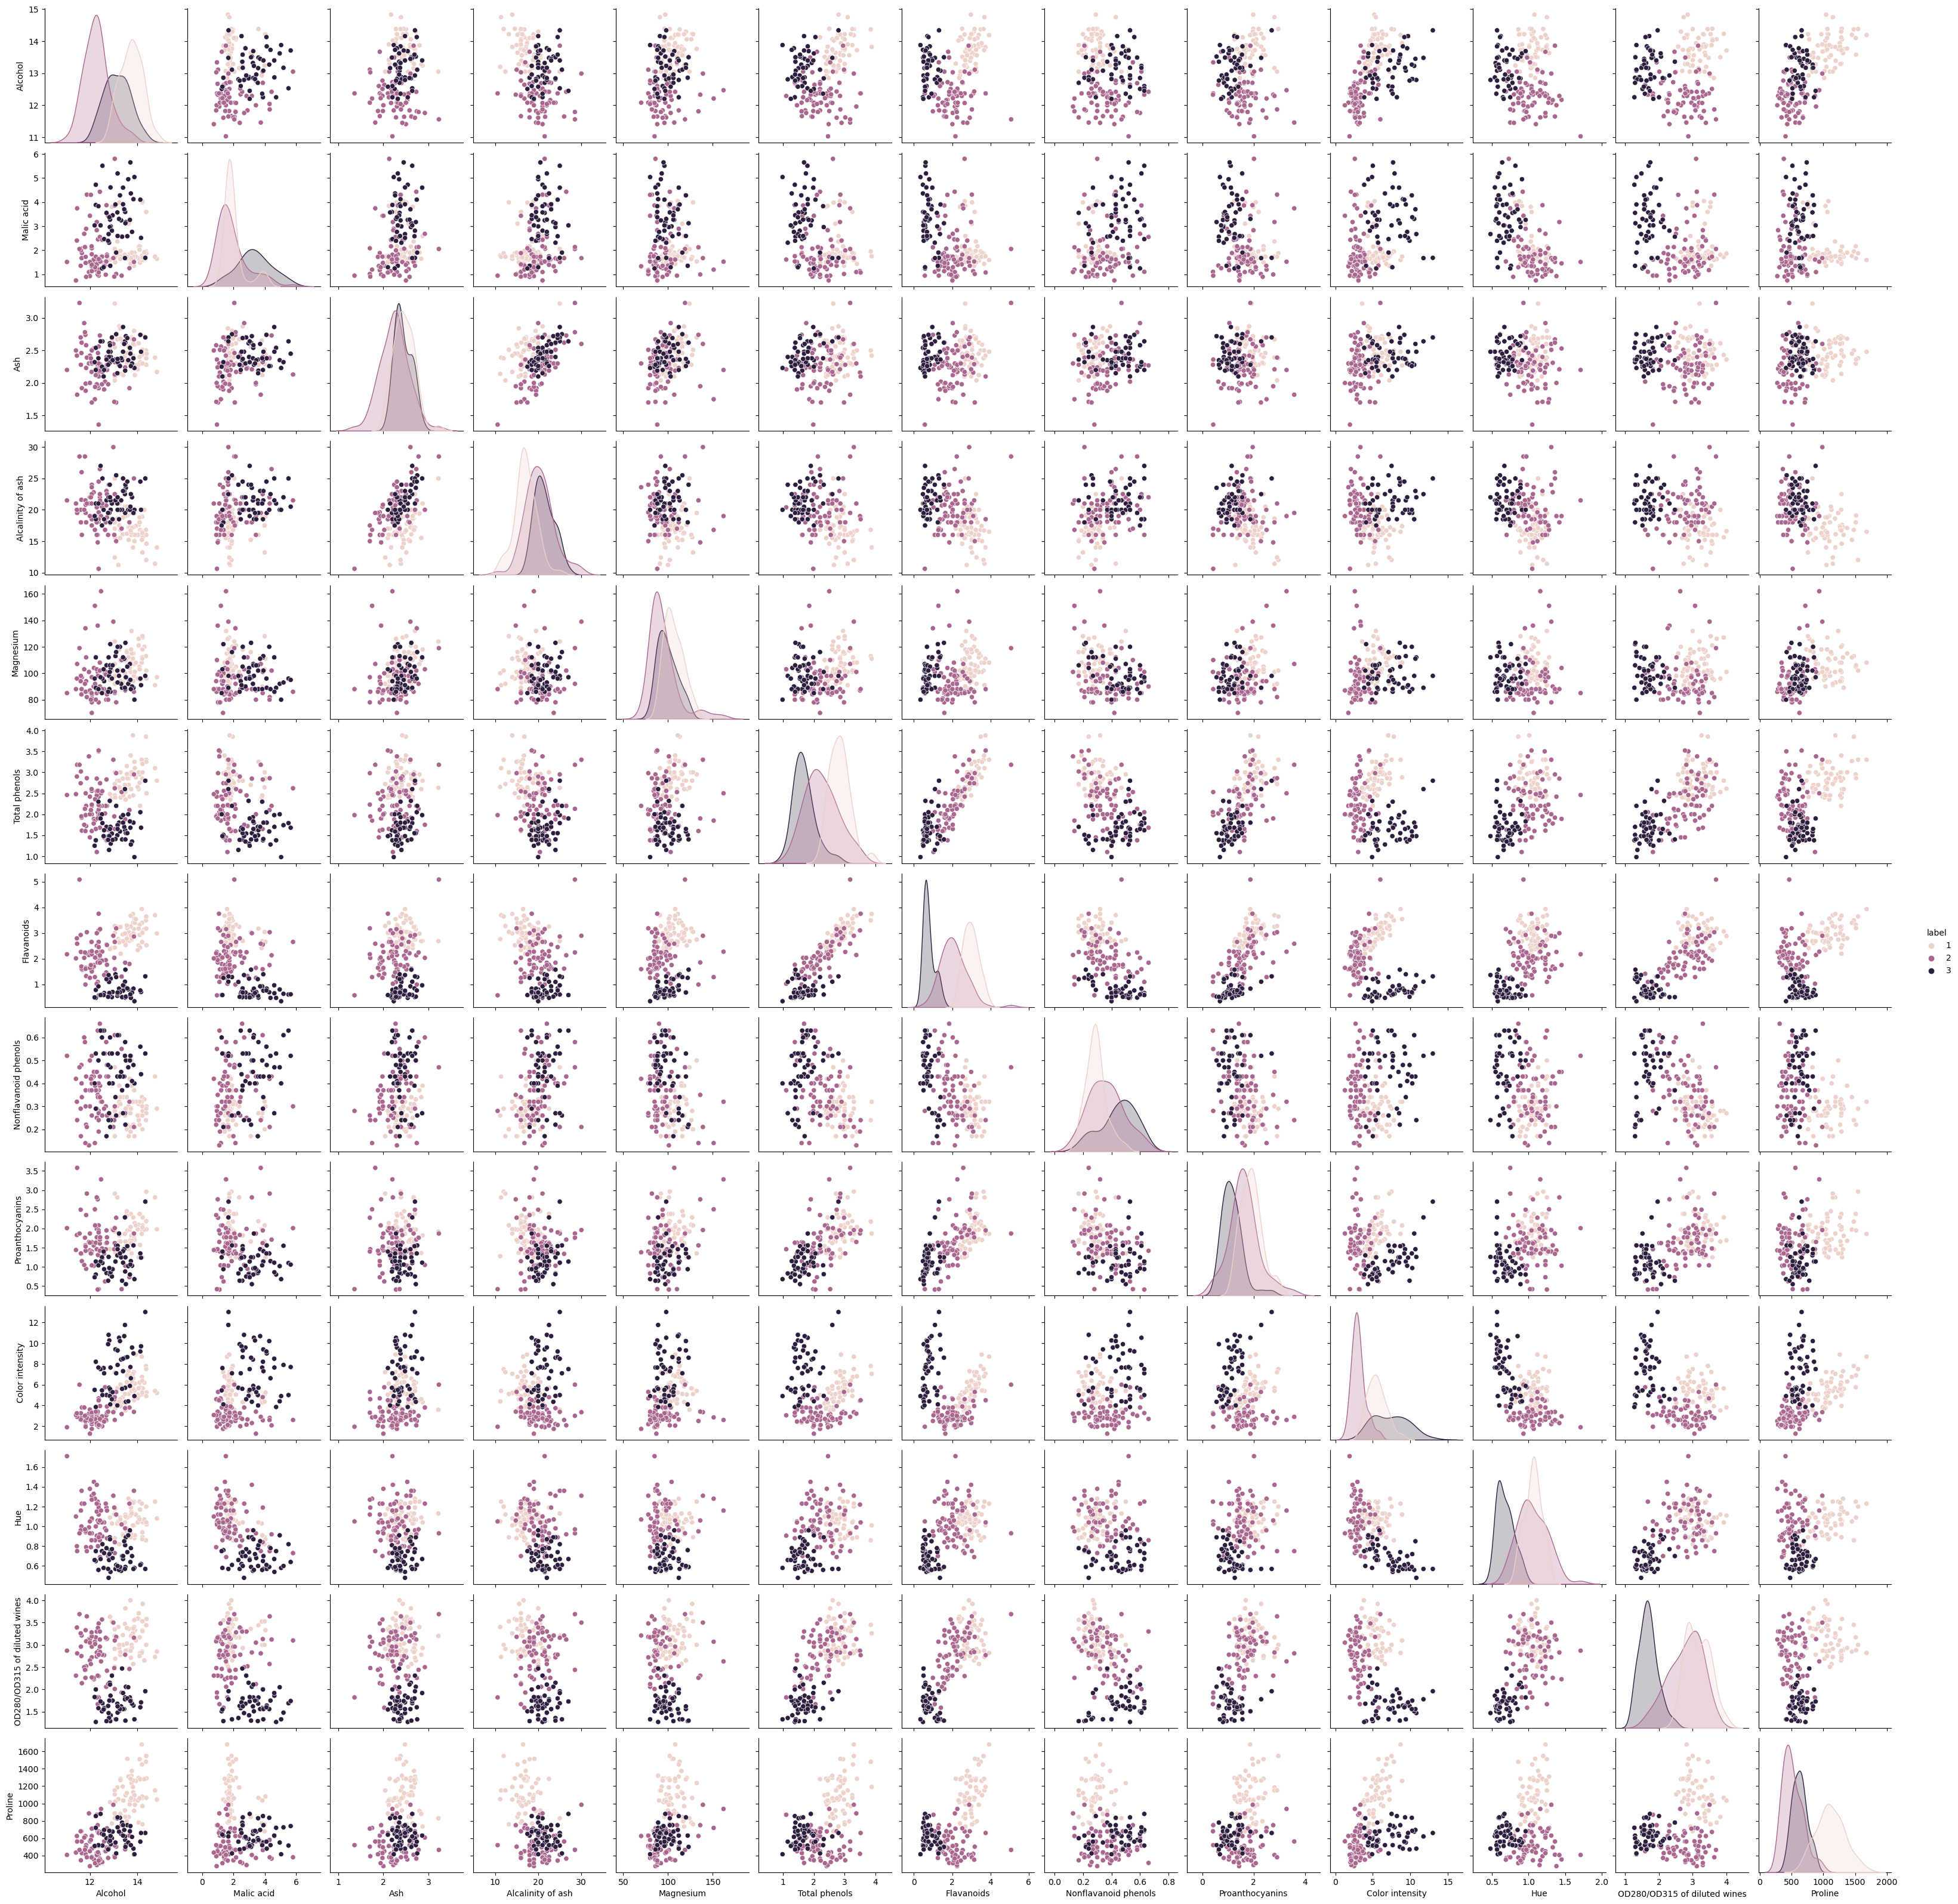

In [32]:
sns.pairplot(wineDF, hue= "label")

<Axes: >

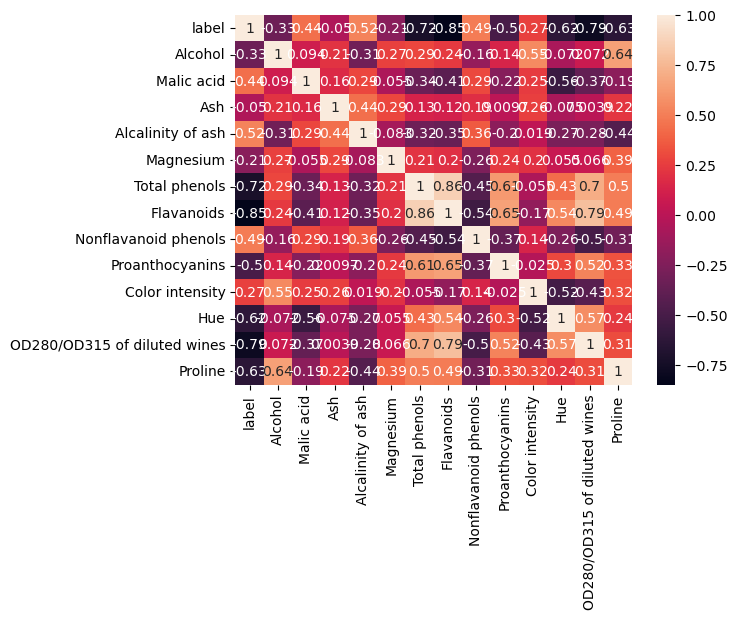

In [33]:
sns.heatmap(wineDF.corr(), annot=True)

# Logistic Regression with Sigmoid


To implement, I choose Alcohol which has a good covariance with label and set X & Y.

In [211]:
# creating sets with only the first and the second classes
wineDF = pd.read_csv("wine/wine.data", names=["label", "Alcohol","Malic acid","Ash","Alcalinity of ash",
                                               "Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols",
                                               "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines",
                                               "Proline"], index_col=False)
wineDF = wineDF.drop((wineDF.loc[wineDF["label"] == 3].index)) # just choosing classes 1 & 2

In [212]:
# test, validation and training sets
X_test = wineDF[["Alcohol"]].sample(frac=0.2)
y_test = wineDF.iloc[X_test.index]["label"]
wineDF = wineDF.drop(X_test.index)
wineDF = wineDF.reset_index(drop=True)
X_validation = wineDF[["Alcohol"]].sample(frac=0.2)
y_validation = wineDF.iloc[X_validation.index]["label"]
wineDF = wineDF.drop(X_validation.index)
wineDF = wineDF.reset_index(drop=True)
X_train = wineDF[["Alcohol"]]
y_train = wineDF["label"]

In [213]:
def sig(x):
    return 1 / (1+np.exp(-x))

In [214]:
class LogisticRegressionWithSig():
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr # learning rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            # convert linear regression to logistic by probability calc through sigmoid
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sig(linear_pred)
            
            # calculating error a.k.a implementing some formulas from class
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            # calculating bias
            db = (1/n_samples) * np.sum(predictions - y)
            
            #updating the weights and the bias
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr *db
            
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sig(linear_pred)
        class_pred = [1 if y < 0.5 else 2 for y in y_pred]
        return np.array(class_pred)
        

In [215]:
classification_logistic_reg = LogisticRegressionWithSig()
classification_logistic_reg.fit(X_train, y_train)
y_pred = classification_logistic_reg.predict(X_test)

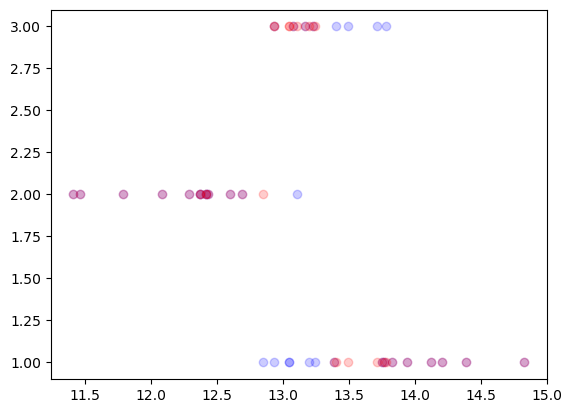

In [225]:
plt.plot(X_test, y_test,"ob",alpha=.2)
plt.plot(X_test, y_pred,"or", alpha=.2)

### checking the accuracy

In [226]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

In [227]:
print(accuracy(y_pred, y_test))

0.6944444444444444


well, this is not really good.

# Multinomial Regression

In [221]:
# creating sets with all three classes
wineDF = pd.read_csv("wine/wine.data", names=["label", "Alcohol","Malic acid","Ash","Alcalinity of ash",
                                               "Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols",
                                               "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines",
                                               "Proline"], index_col=False)
# test, validation and training sets
X_test = wineDF[["Alcohol"]].sample(frac=0.2)
y_test = wineDF.iloc[X_test.index]["label"]
wineDF = wineDF.drop(X_test.index)
wineDF = wineDF.reset_index(drop=True)
X_validation = wineDF[["Alcohol"]].sample(frac=0.2)
y_validation = wineDF.iloc[X_validation.index]["label"]
wineDF = wineDF.drop(X_validation.index)
wineDF = wineDF.reset_index(drop=True)
X_train = wineDF[["Alcohol"]]
y_train = wineDF["label"]

In [222]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.6944444444444444

The accuracy score ranges between 0.62-0.72 since the training and test sets are random and different every time.

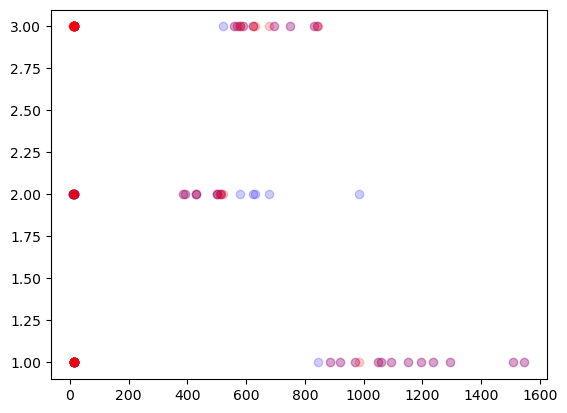

In [195]:
plt.plot(X_test, y_test, 'ob', alpha=0.2)
plt.plot(X_test,y_pred,'or', alpha=0.2)

# Support Vector Machines

To implement, I choose two features and set X & Y. Since I see a high covarience of 0.64 between them, I'll choose Alcohol and Proline.

In [188]:
wineDF = pd.read_csv("wine/wine.data", names=["label", "Alcohol","Malic acid","Ash","Alcalinity of ash",
                                               "Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols",
                                               "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines",
                                               "Proline"], index_col=False)

In [189]:
# test, validation and training sets
X_test = wineDF[["Alcohol", "Proline"]].sample(frac=0.2)
y_test = wineDF.iloc[X_test.index]["label"]
wineDF = wineDF.drop(X_test.index)
wineDF = wineDF.reset_index(drop=True)
X_validation = wineDF[["Alcohol", "Proline"]].sample(frac=0.2)
y_validation = wineDF.iloc[X_validation.index]["label"]
wineDF = wineDF.drop(X_validation.index)
wineDF = wineDF.reset_index(drop=True)
X_train = wineDF[["Alcohol", "Proline"]]
y_train = wineDF["label"]

Support Vector Machines are great if we are working with multi-dimensional datasests and doing multi-classification. It is important to keep in minde that SVM is not great with outliers.

In [190]:
from sklearn import svm

In [191]:
svm = svm.SVC()
svm_model = svm.fit(X_train, y_train)

In [192]:
y_pred = svm_model.predict(X_test)

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       0.89      0.62      0.73        13
           3       0.64      0.90      0.75        10

    accuracy                           0.81        36
   macro avg       0.82      0.81      0.80        36
weighted avg       0.83      0.81      0.80        36



The accuracy is a little below than the data provided for baseline model performance with the dataset which suggests 80 percent for Support Machine Vectors.

Text(0.5, 1.0, 'Test vs prediction')

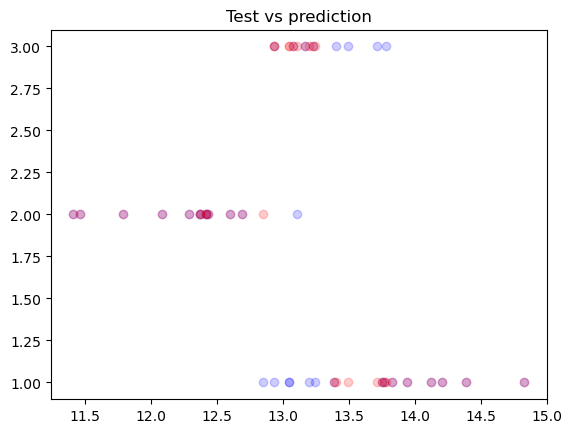

In [224]:
plt.plot(X_test, y_test, 'ob', alpha=0.2)
plt.plot(X_test,y_pred,'or', alpha=0.2)
plt.title("Test vs prediction")

# Unsupervised Learning for k-means

In [21]:
from sklearn.metrics.pairwise import euclidean_distances

In [198]:
class kmeans:
    """ The k-Means algorithm"""
    
    def __init__(self, k, data):
        """Initially assign each sample to a random cluster.
           Assign each centroid to be a zero vector.
        """
        self.nData = np.shape(data)[0]
        self.nDim = np.shape(data)[1]
        self.k = k
        self.data = np.hstack((np.random.randint(0, self.k, (self.nData, 1)), data))
        self.centroids = np.zeros((self.k, self.nDim))
        self.make_centroids()
        self.wcv = np.zeros(self.k)

    def make_centroids(self):
        """Calculate centroids of current clusters"""
        
        for i in range(self.k):
            cluster = self.data[self.data[:, 0]==i]
            cluster = cluster[:, 1:]
            self.centroids[i] = np.mean(cluster, axis=0)

    def make_clusters(self):
        distances = np.zeros((self.nData, self.k))
        for i in range(self.k):
            distances[:, i] = np.sum((self.data[:, 1:] - self.centroids[i,:])**2,axis=1)
        self.data[:,0] = np.argmin(distances, axis=1)
        
    def within_cluster_variation(self):
        """Calculate within-cluster variation of current clusters"""
        
        for i in range(self.k):
            cluster = self.data[self.data[:, 0]==i]
            cluster = cluster[:, 1:]
            distances = euclidean_distances(cluster, cluster)
            self.wcv[i] = np.sum(distances)/(2*cluster.shape[0])
        
    def cluster(self, iterations=1):
        """Perform k-Means"""
        for i in range(iterations):
            self.make_clusters()
            self.make_centroids()
        self.within_cluster_variation()
        labels = self.data[:,0]
        return labels, self.centroids

In [204]:
wineDF = pd.read_csv("wine/wine.data", names=["label", "Alcohol","Malic acid","Ash","Alcalinity of ash",
                                               "Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols",
                                               "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines",
                                               "Proline"], index_col=False)
# test, validation and training sets
X_test = wineDF[["Alcohol", "Proline","label"]].sample(frac=0.2)
y_test = wineDF.iloc[X_test.index]["label"]
wineDF = wineDF.drop(X_test.index)
wineDF = wineDF.reset_index(drop=True)
X_validation = wineDF[["Alcohol", "Proline"]].sample(frac=0.2)
y_validation = wineDF.iloc[X_validation.index]["label"]
wineDF = wineDF.drop(X_validation.index)
wineDF = wineDF.reset_index(drop=True)
X_train = wineDF[["Alcohol", "Proline"]]
y_train = wineDF["label"]
print(X_train.shape)

(114, 2)


In [205]:
km = kmeans(3, X_test)

In [206]:
labels, centroids = km.cluster(100)
c0 = X_test[labels==0]
c1 = X_test[labels==1]
c2 = X_test[labels==2]
print(c0.shape, c1.shape, c2.shape)

(15, 3) (12, 3) (9, 3)


Within-cluster variation: [614.57975244 545.76899173 735.56614932]


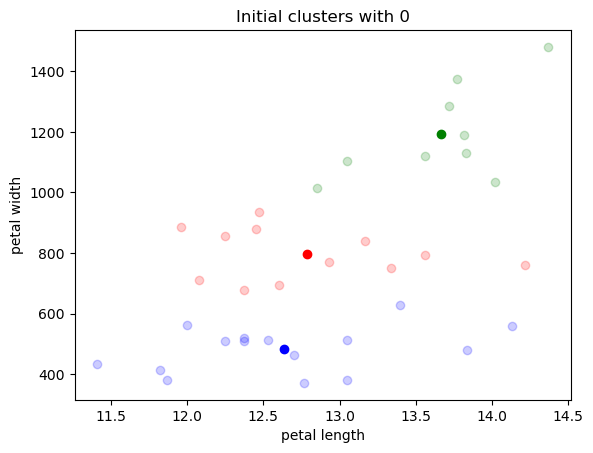

In [207]:
plt.plot(c0.iloc[:,0], c0.iloc[:,1], 'ob', alpha=0.2)
plt.plot(c1.iloc[:,0], c1.iloc[:,1], 'or', alpha=0.2)
plt.plot(c2.iloc[:,0], c2.iloc[:,1], 'og', alpha=0.2)
plt.plot(centroids[0,0], centroids[0,1], 'ob')
plt.plot(centroids[1,0], centroids[1,1], 'or')
plt.plot(centroids[2,0], centroids[2,1], 'og')
plt.title("Initial clusters with 0")
plt.xlabel("petal length")
plt.ylabel("petal width")
print("Within-cluster variation:", km.wcv)

original data

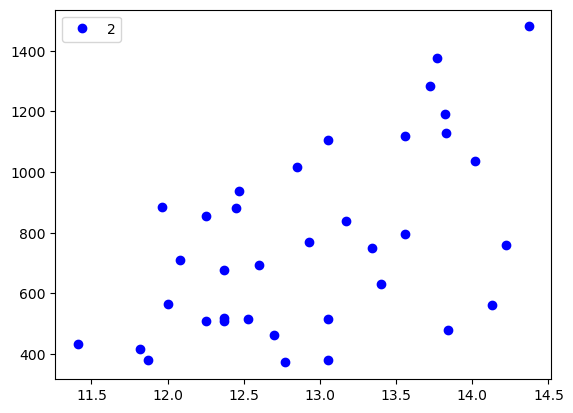

In [210]:
plt.plot(X_test.iloc[:,0],X_test.iloc[:,1],"ob")
plt.legend(X_test["label"])
plt.show()